# Задание 4. Прогнозирование с помощью метода Брауна

In [1]:
import os
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [3]:
from pandas import read_csv
df = read_csv('task4.csv',parse_dates = True, index_col = 0,delimiter=';',decimal=',')
df.head()

,Доход в сегментах потребителей
Дата,
2007-01-01,10186.17
2007-02-01,10249.57
2007-03-01,10353.63
2007-04-01,10213.59
2007-05-01,10372.17


In [4]:
df.columns = ['y']

#### Построим график временного ряда:

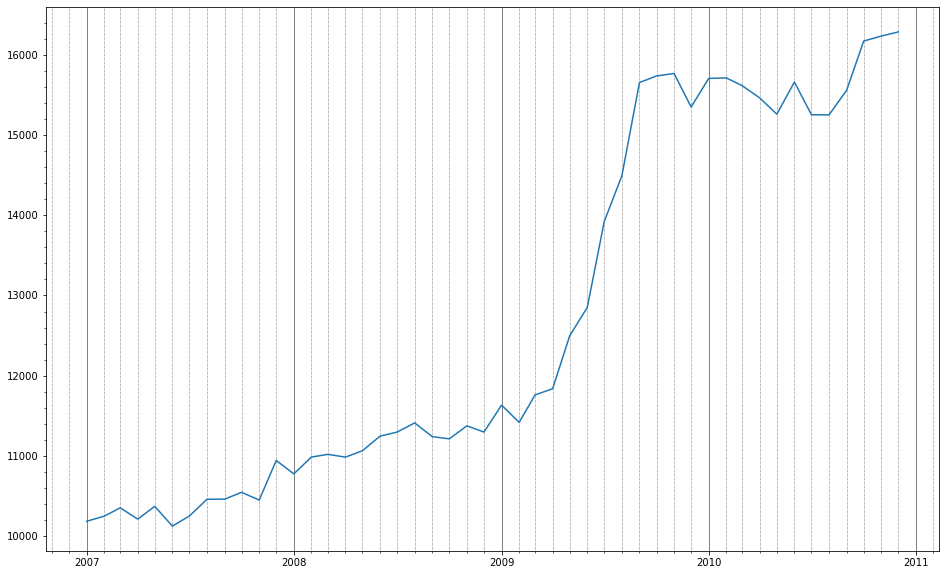

In [5]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df)

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.minorticks_on()
ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth = range(1, 13)))

ax.set_axisbelow(True)

plt.show()

### Воспользуемся средставами библиотеки statsmodels
Для своего временного ряда построить пройденные модели прогнозирования, пользуясь встроенными функциями Statmodels

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [7]:
arr = df['y']
df.index = pd.DatetimeIndex(df.index.values, freq='MS')

In [8]:
def RSME(ts1, ts2):
    return np.sqrt(np.sum(np.power(ts1 - ts2, 2)) / len(ts1))

In [9]:
model = SimpleExpSmoothing(df['y']).fit()
forecast = model.forecast(12)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Параметры оптимизированной модели:

In [10]:
model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995,True
initial_level,l.0,10186.170,True


$l_ 0 = 10186.17$

Начальный уровень подбирается исходя из минимизации оcтатков и не имеет особой интерпритации

$\alpha = 0.995$

Параметр $\alpha$ близок к единице, что означает что больший вес имеют последние наблюдения


In [11]:
RSME(model.fittedvalues, arr)

338.3781553414726

### Построим график исходного временного ряда, смоделированный ряд и прогноз

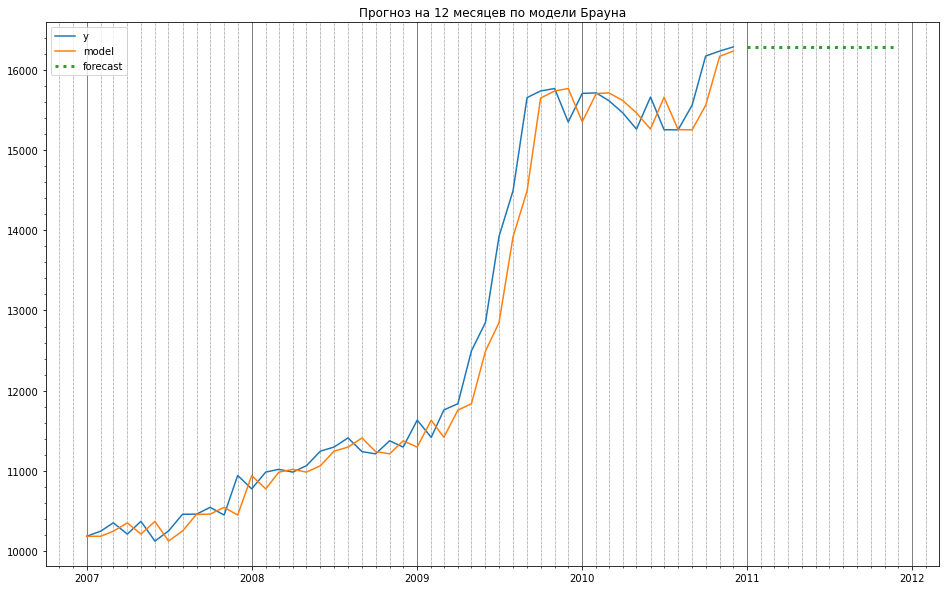

In [12]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['y'], label = 'y')

ax.plot(model.fittedvalues, label = 'model')

ax.plot(forecast, label = 'forecast', linestyle = ':', linewidth = '3')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.minorticks_on()
ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth = range(1, 13)))

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Брауна')

plt.show()

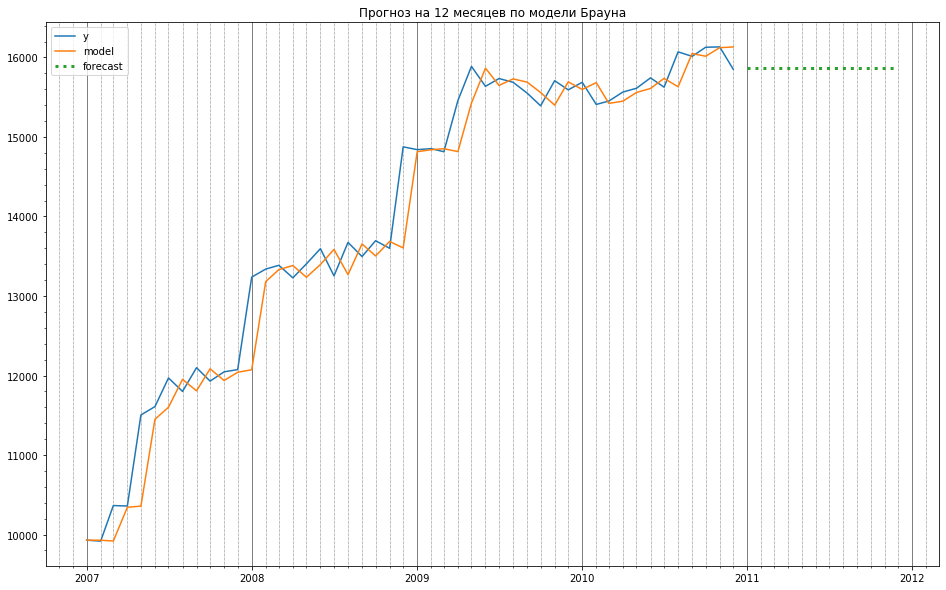

In [85]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['y'], label = 'y')

ax.plot(model.fittedvalues, label = 'model')

ax.plot(forecast, label = 'forecast', linestyle = ':', linewidth = '3')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.minorticks_on()
ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth = range(1, 13)))

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Брауна')

plt.show()

### Построим линейный тренд, используя МНК с дисконтированием данных

In [13]:
alpha = 0.2
df['t'] = np.array([i for i in range(1, len(df) + 1)])
df['v'] = np.array([alpha * (1 - alpha)**(len(df)-i) for i in range(1, len(df) + 1)])

In [14]:
b = (np.sum(df['t'] * df['v'] * df['y']) - np.sum(df['t'] * df['v']) * np.sum(df['y'] * df['v'])) / (np.sum(np.power(df['t'], 2) * df['v']) - np.power(np.sum(df['t'] * df['v']), 2))

In [15]:
a = np.sum(df['y'] * df['v']) - b * np.sum(df['t'] * df['v'])

In [16]:
print(a, b)

10361.02862679747 122.78230917853693


In [17]:
from scipy.optimize import differential_evolution, minimize

In [18]:
def f(x):
    a, b = x
    return np.sum(df['v'] * np.power(df['y'] - a - b * df['t'], 2))

In [19]:
minimize(f, [1000, 10])

      fun: 169502.641500403
 hess_inv: array([[ 2.10339549e+01, -4.73084139e-01],
       [-4.73084139e-01,  1.08952274e-02]])
      jac: array([ 0.        , -0.00390625])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 168
      nit: 10
     njev: 52
   status: 2
  success: False
        x: array([10383.68356579,   122.27268663])

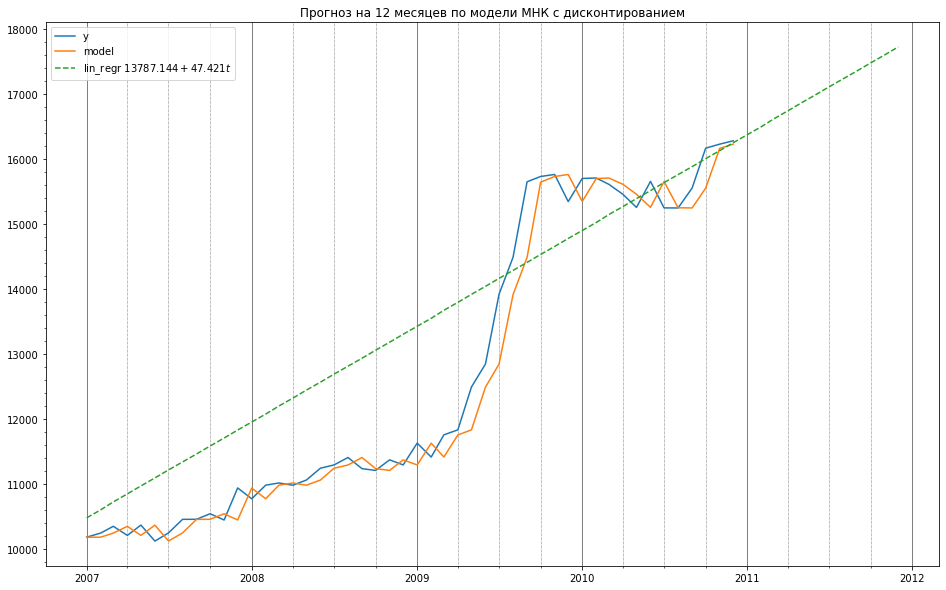

In [23]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['y'], label = 'y')

ax.plot(model.fittedvalues, label = 'model')



ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(df) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'lin_regr $13787.144 + 47.421 t$', linestyle = '--')


ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.minorticks_on()
ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth = range(1, 13,3)))

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием')

plt.show()

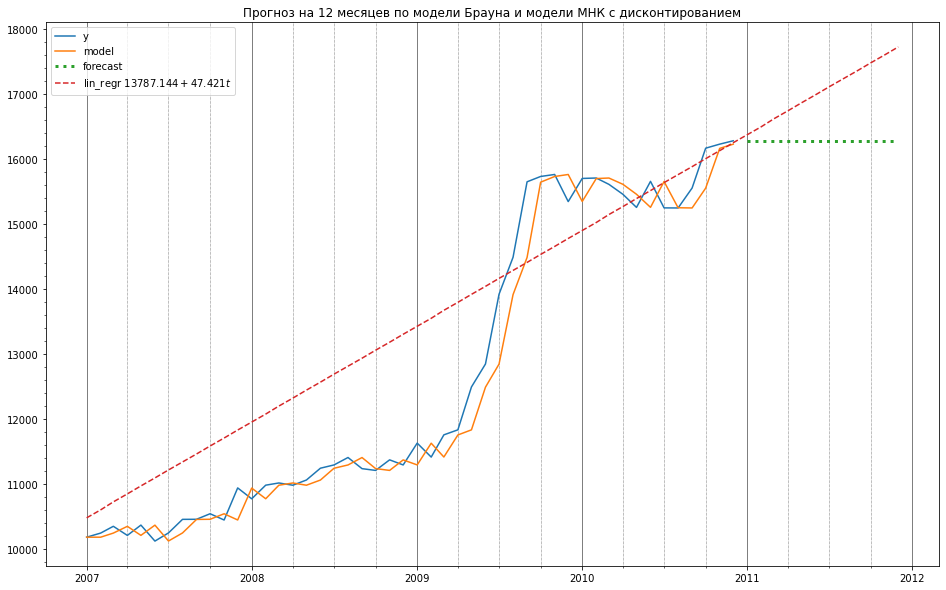

In [25]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['y'], label = 'y')

ax.plot(model.fittedvalues, label = 'model')

ax.plot(forecast, label = 'forecast', linestyle = ':', linewidth = '3')

ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(df) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'lin_regr $13787.144 + 47.421 t$', linestyle = '--')


ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.minorticks_on()
ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth = range(1, 13,3)))

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Брауна и модели МНК с дисконтированием')

plt.show()

# Способ 2

In [2]:
import numpy as np
import pandas as pd
import sys
import statsmodels as ss
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data= pd.read_excel('data.xls', sheet_name='Income')

In [4]:
dates = data.loc[data.index == 0].values[0, 2:]
val = data.loc[data.index == 1].values[0, 2:]

In [5]:
df = pd.DataFrame(data={"Value": val},index=dates)
df.head()

,Value
2007-01-01,10186.17
2007-02-01,10249.57
2007-03-01,10353.63
2007-04-01,10213.59
2007-05-01,10372.17


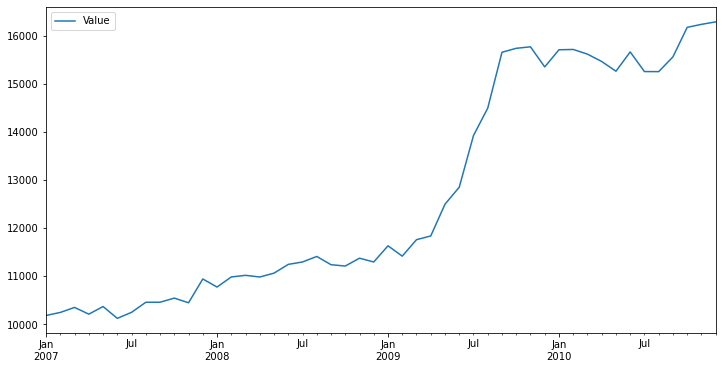

In [6]:
df.plot(figsize=(12,6))
plt.show()

## Функции преобразования экспоненциальным сглаживанием

Для прогнозирования с помощью экспоненциального сглаживания применяется следующий метод:

<font size="4">
$$\hat{y}_{t+1|t} = l_t$$

$$l_t = \alpha  y_t + (1-\alpha)  l_{t-1}, \quad \alpha \in [0,1] $$
</font>
Причем в качестве начального значения $l_0$ берется первое значение ряда $y$: 
<font size="4">
$$y_0 = l_0 $$
</font>

In [7]:
def exponential_smoothing(y,alpha,level):
    l = [level]
    for t in range(1, len(y)):
        l.append(alpha * y[t] + (1 - alpha)* l[-1])
    return l

In [8]:
y = df.iloc[:,0].values #y = dt.y.values

alpha, level = 0.7, y[0] 

df['exp'] = exponential_smoothing(y, alpha, level)

In [9]:
df.head()

,Value,exp
2007-01-01,10186.17,10186.17000
2007-02-01,10249.57,10230.55000
2007-03-01,10353.63,10316.70600
2007-04-01,10213.59,10244.52480
2007-05-01,10372.17,10333.87644


<AxesSubplot:>

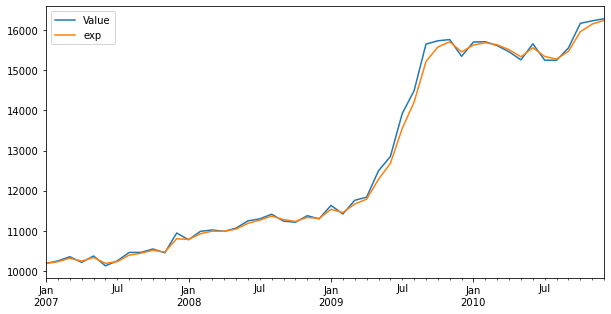

In [10]:
df.plot(figsize=[10,5])

## Подбор оптимального значения альфа

In [11]:
from sklearn.metrics import mean_squared_error

def exponential_smoothing_mse(y,alpha,level):
    l = [level]
    for t in range(1, len(y)):
        l.append(alpha * y[t] + (1 - alpha)* l[-1])
    return mean_squared_error(y[1:],l[:-1])

In [12]:
es_mse = exponential_smoothing_mse(y,alpha,level)

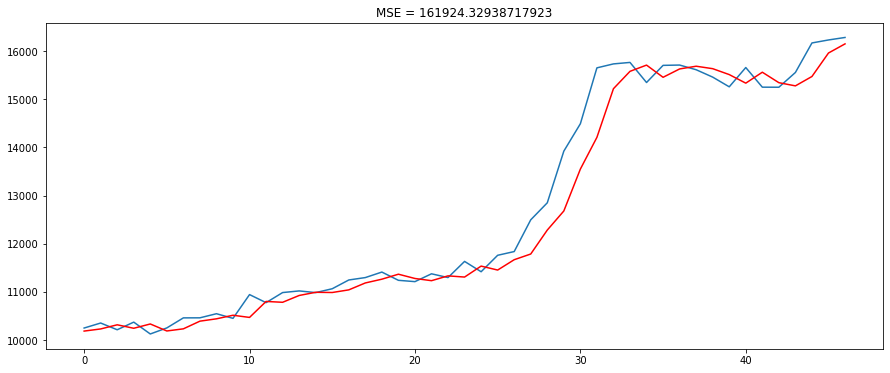

In [13]:
plt.figure(figsize=(15,6))
plt.plot(y[1:])
plt.plot(exponential_smoothing(y, alpha, y[0])[:-1], color='r')
plt.title('MSE = ' + str(es_mse))
plt.show()

In [19]:
from scipy.optimize import minimize
res = minimize(lambda x: exponential_smoothing_mse(y, x[0], x[1]), [1, y[0]])
res

      fun: 112015.31697242199
 hess_inv: array([[ 2.08280709e-06, -2.13942753e-04],
       [-2.13942753e-04,  1.57405570e+01]])
      jac: array([-0.00585938,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 109
      nit: 10
     njev: 35
   status: 2
  success: False
        x: array([1.14062123e+00, 1.02316291e+04])

In [16]:
res.fun, res.x

(112015.31697242199, array([1.14062123e+00, 1.02316291e+04]))

In [17]:
best_alpha, best_level = res.x

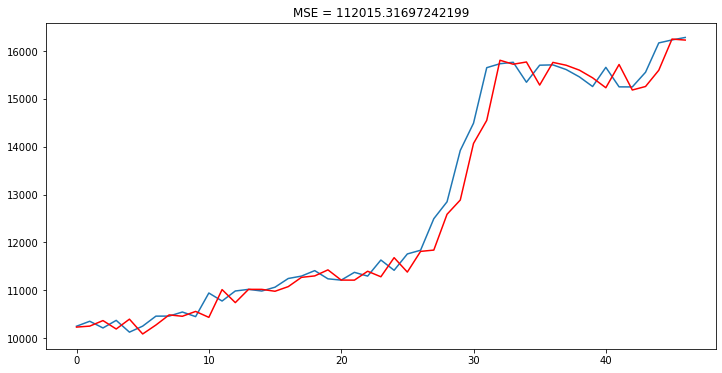

In [18]:
plt.figure(figsize=(12,6))
plt.plot(y[1:])
plt.plot(exponential_smoothing(y, best_alpha, best_level)[:-1], color='r')
plt.title('MSE = ' + str(res.fun))
plt.show()